# HW2
## Yidan Wang 2973331278

### Question 1

In [1]:
# load the data and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import OLSInfluence
from yellowbrick.regressor import CooksDistance
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import neighbors
from sklearn.preprocessing import MinMaxScaler


data_file = '../data/CCPP/Folds5x2_pp.xlsx'
raw_data = pd.read_excel(data_file, sheet_name = 'Sheet1') 
display(raw_data)

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


### (b) Exploring the data:

#### i. How many rows are in this data set? How many columns? What do the rows and columns represent?

There are 9568 rows and 5 columns in the data set.   
Every row is a data point collected from a Combined Cycle Power Plant over 6 years (2006-2011).   
The first four columns are features consist of hourly average ambient variables Temperature (AT), Exhaust Vacuum (V), Ambient Pressure (AP), and Relative Humidity (RH).
The last column PE is the dependent variable "the net hourly electrical energy output of the plant."

#### ii. Make pairwise scatterplots of all the varianbles in the data set including the predictors (independent variables) with the dependent variable. Describe your ﬁndings.
##### Answer:  
1. As the Temperature increases, the Energy output will decrease.
2. As the Exhaust Vacuum increases, the Energy output will decrease.
3. There is also inversely relationship between the Temperature and Exhaust Vacuum.

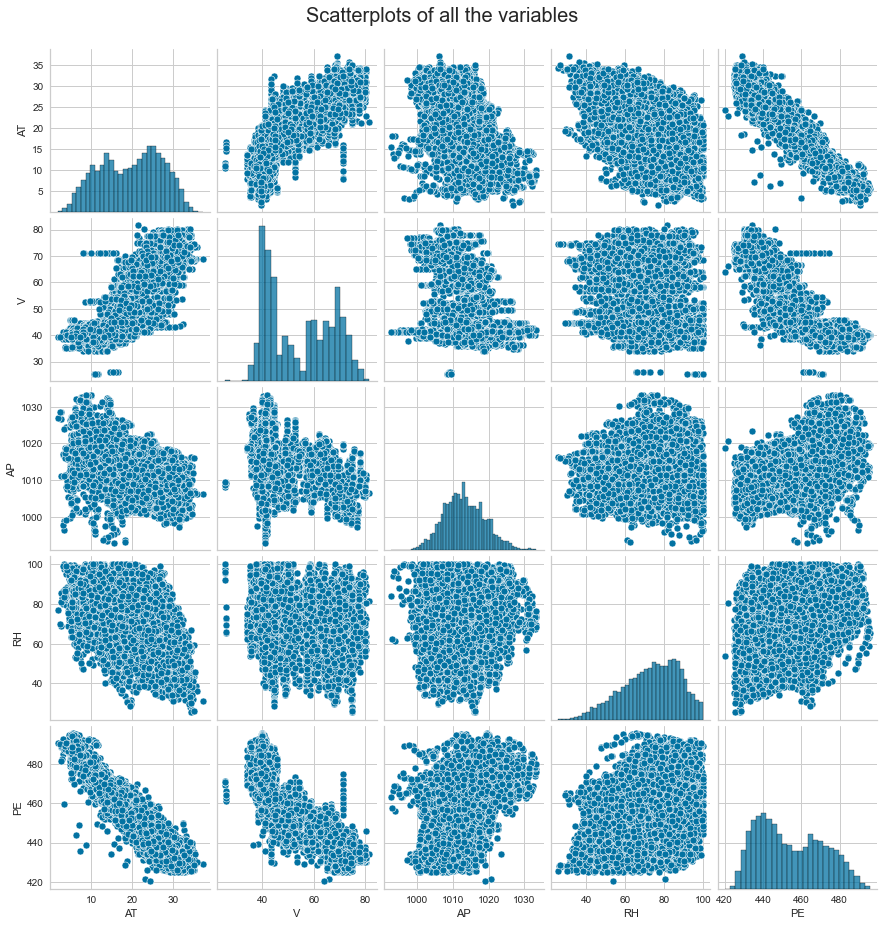

In [2]:
g1 = sns.pairplot(
    data=raw_data, kind="scatter", diag_kind="hist"
)
g1.fig.suptitle("Scatterplots of all the variables", y=1.03, fontsize=20)
plt.show()

#### iii. What are the mean, the median, range, ﬁrst and third quartiles, and interquartile ranges of each of the variables in the dataset? Summarize them in a table.

In [3]:
stats = raw_data.describe().T
stats["range"] = stats["max"]-stats["min"]
stats["IQR"] = stats["75%"]-stats["25%"]
stats.drop(["count", "std", "min", "max"], axis=1, inplace=True)
display(stats)

,mean,25%,50%,75%,range,IQR
AT,19.651231,13.5100,20.345,25.72,35.30,12.2100
V,54.305804,41.7400,52.080,66.54,56.20,24.8000
AP,1013.259078,1009.1000,1012.940,1017.26,40.41,8.1600
RH,73.308978,63.3275,74.975,84.83,74.60,21.5025
PE,454.365009,439.7500,451.550,468.43,75.50,28.6800


### (c) For each predictor, ﬁt a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically signiﬁcant association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks?

#### Answer.

1. Simple linear regression (independent: AT dependent: PE)  $R^2=0.899$  Model and Variable $P=0.000$. statistically signiﬁcant association between AT and PE  
$PE = 497.0341 + -2.1713 AT + \epsilon$

2. Simple linear regression (independent: V dependent: PE)  $R^2=0.757$  Model and Variable $P=0.000$. statistically signiﬁcant association between V and PE  
$PE = 517.8015 + -1.1681 V + \epsilon$

3. Simple linear regression (independent: AP dependent: PE)  $R^2=0.269$  Model and Variable $P=0.000$.   
Even though P values show that there is statistically signiﬁcant association between AP and PE. $R^2$ shows that the model is not so accurate. The model does not fit the data so much. Only 26.9% of the variance can be explained by the model.  
$PE = -1055.261 + 1.4899 AP + \epsilon$

4. Simple linear regression (independent: RH dependent: PE)  $R^2=0.152$  Model and Variable $P=0.000$.   
Even though P values show that there is statistically signiﬁcant association between RH and PE. $R^2$ shows that the model is not so accurate. The model does not fit the data so much. Only 15.2% of the variance can be explained by the model.  
$PE = 420.9618 + 0.4557 RH + \epsilon$


#### To find the outliers, use Cook distance (threshold is 4/n) to detect the outliers. Plot them, then remove the outliers and fit the regression again. 
#### From the results $R^2$ and plot, we can come to the conclusion that the model fit data better without outliers
##### For AT and PE, there are 6.93% outliers. After removing them, the $R^2$ increases from 0.899 to 0.920  
##### For V and PE, there are 2.61% outliers. After removing them, the $R^2$ increases from 0.757 to 0.798   
##### For AP and PE, there are 3.85% outliers. After removing them, the $R^2$ increases from 0.269 to 0.361   
##### For RH and PE, there are 4.04% outliers. After removing them, the $R^2$ increases from 0.152 to 0.196  

AT and PE linear regression:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Thu, 23 Sep 2021   Prob (F-statistic):               0.00
Time:                        00:12:59   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    497.0341      0.156   3177.280      0.000     496.727     497.341
AT            -2.1713      0.007   -291.715      0.000      -2.186      -2.157
==============================================================================
Omnibus:                      417.457   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1117.844
Skew:                          -0.209   Prob(JB):                    1.83e-243
Kurtosis:                       4.621   Cond. No.                         59.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

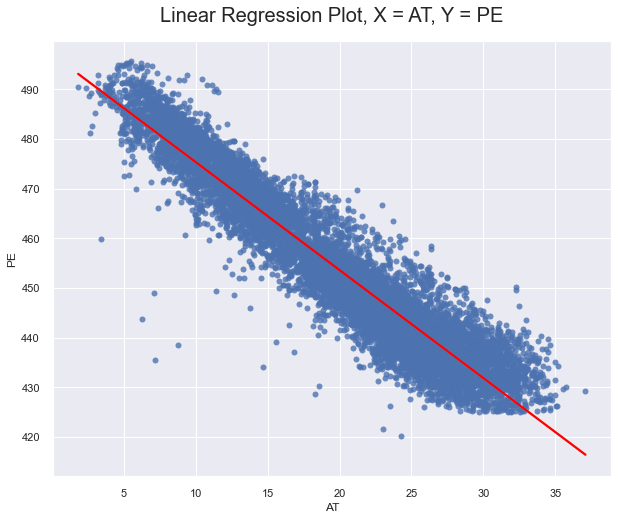

AT and PE linear regression (remove outliers):


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 1.047e+05
Date:                Thu, 23 Sep 2021   Prob (F-statistic):               0.00
Time:                        00:12:59   Log-Likelihood:                -27302.
No. Observations:                9152   AIC:                         5.461e+04
Df Residuals:                    9150   BIC:                         5.462e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    498.0196      0.143   3471.047      0.000     497.738     498.301
AT            -2.2336      0.007   -323.549      0.000      -2.247      -2.220
==============================================================================
Omnibus:                       97.147   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.634
Skew:                          -0.055   Prob(JB):                     1.52e-14
Kurtosis:                       2.607   Cond. No.                         59.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

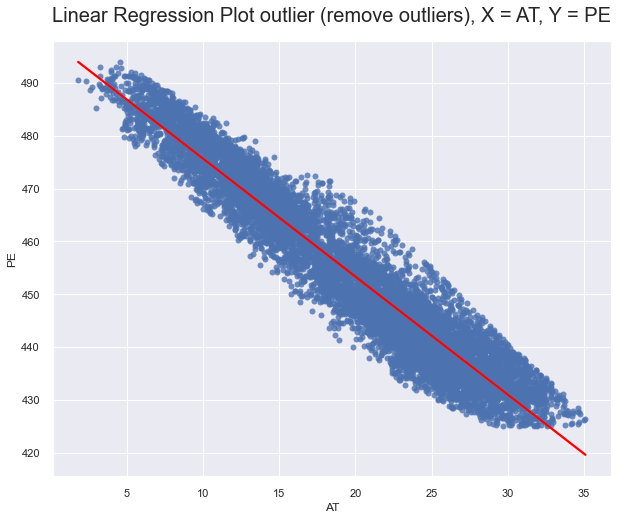

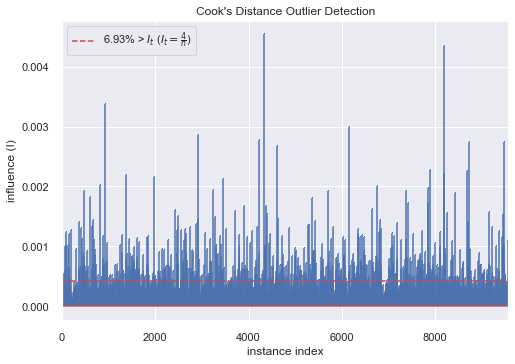


V and PE linear regression:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Thu, 23 Sep 2021   Prob (F-statistic):               0.00
Time:                        00:13:01   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    517.8015      0.378   1370.218      0.000     517.061     518.542
V             -1.1681      0.007   -172.402      0.000      -1.181      -1.155
==============================================================================
Omnibus:                       77.693   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.571
Skew:                          -0.097   Prob(JB):                     1.61e-24
Kurtosis:                       3.487   Cond. No.                         245.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

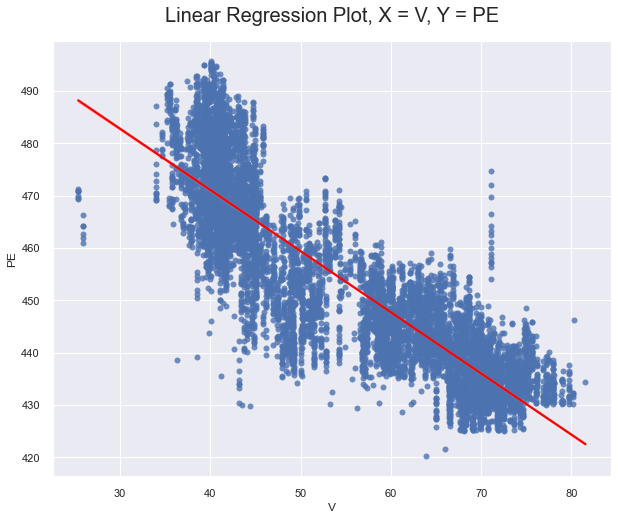

V and PE linear regression (remove outliers):


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                 3.612e+04
Date:                Thu, 23 Sep 2021   Prob (F-statistic):               0.00
Time:                        00:13:01   Log-Likelihood:                -31275.
No. Observations:                9145   AIC:                         6.255e+04
Df Residuals:                    9143   BIC:                         6.257e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    517.4793      0.344   1502.660      0.000     516.804     518.154
V             -1.1666      0.006   -190.051      0.000      -1.179      -1.155
==============================================================================
Omnibus:                       62.212   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.386
Skew:                          -0.131   Prob(JB):                     2.56e-12
Kurtosis:                       2.732   Cond. No.                         250.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

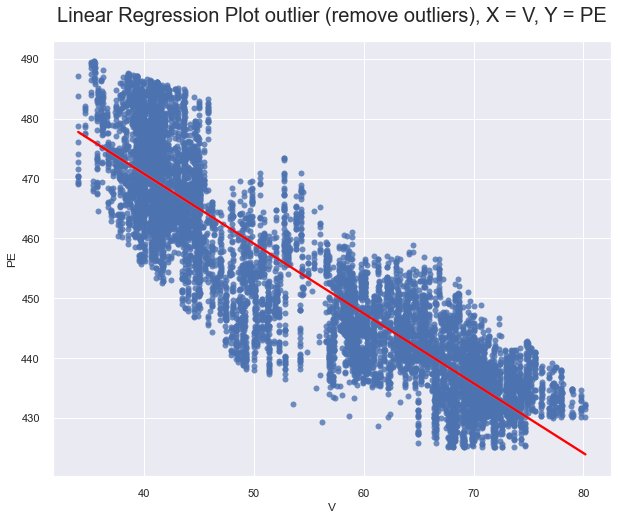

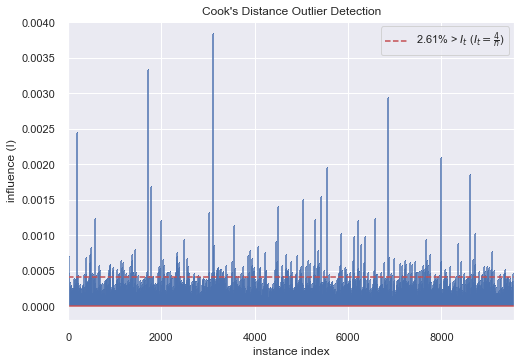


AP and PE linear regression:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Thu, 23 Sep 2021   Prob (F-statistic):               0.00
Time:                        00:13:02   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1055.2610     25.459    -41.449      0.000   -1105.167   -1005.355
AP             1.4899      0.025     59.296      0.000       1.441       1.539
==============================================================================
Omnibus:                      525.438   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.290
Skew:                           0.616   Prob(JB):                    1.10e-133
Kurtosis:                       2.859   Cond. No.                     1.73e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

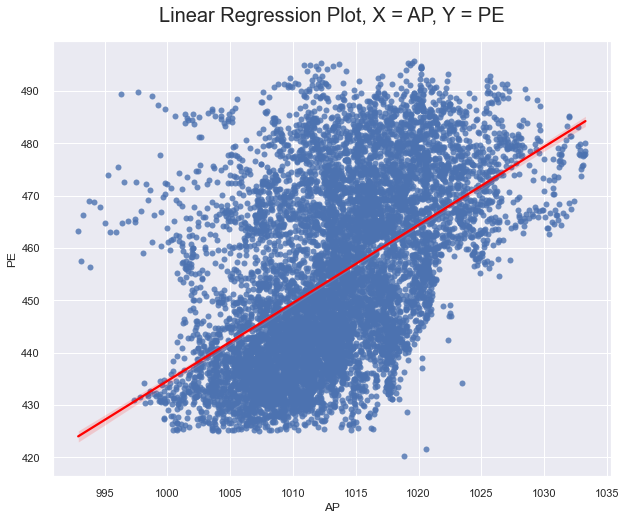

AP and PE linear regression (remove outliers):


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     5234.
Date:                Thu, 23 Sep 2021   Prob (F-statistic):               0.00
Time:                        00:13:03   Log-Likelihood:                -37219.
No. Observations:                9268   AIC:                         7.444e+04
Df Residuals:                    9266   BIC:                         7.446e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1334.8378     24.723    -53.992      0.000   -1383.300   -1286.376
AP             1.7648      0.024     72.346      0.000       1.717       1.813
==============================================================================
Omnibus:                      405.234   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              422.612
Skew:                           0.494   Prob(JB):                     1.70e-92
Kurtosis:                       2.658   Cond. No.                     1.80e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

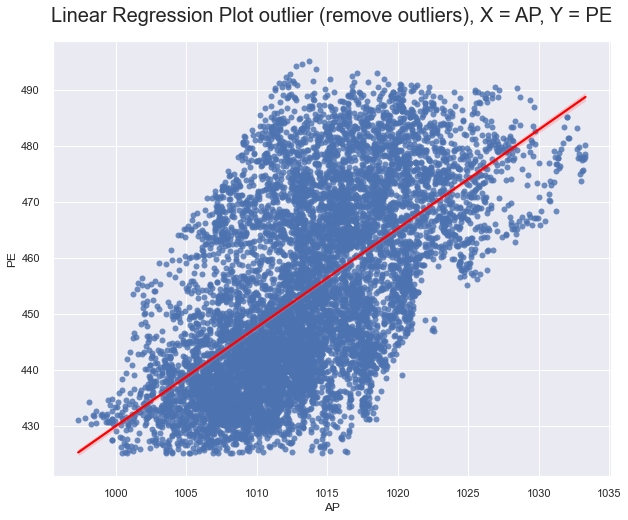

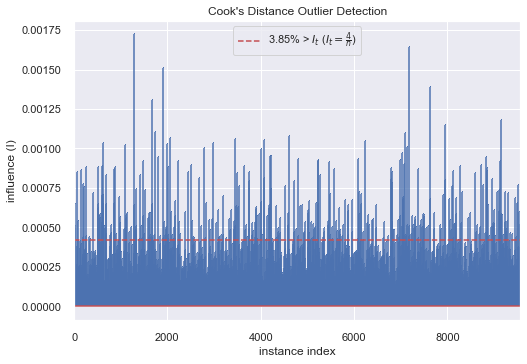


RH and PE linear regression:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Thu, 23 Sep 2021   Prob (F-statistic):               0.00
Time:                        00:13:04   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    420.9618      0.823    511.676      0.000     419.349     422.574
RH             0.4557      0.011     41.399      0.000       0.434       0.477
==============================================================================
Omnibus:                      772.278   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              319.245
Skew:                           0.231   Prob(JB):                     4.75e-70
Kurtosis:                       2.234   Cond. No.                         383.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

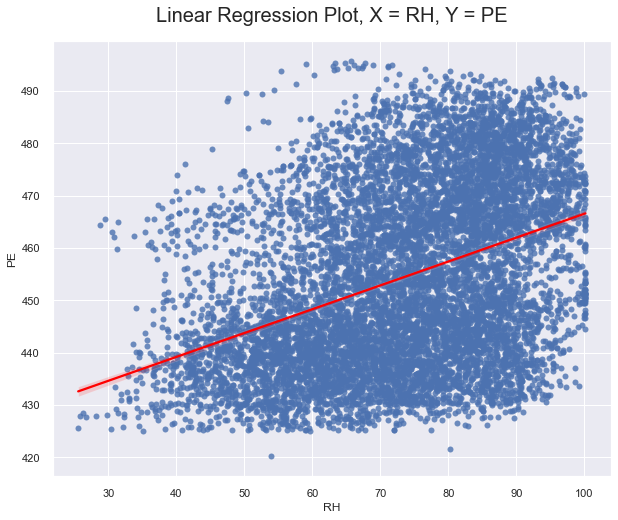

RH and PE linear regression (remove outliers):


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     2277.
Date:                Thu, 23 Sep 2021   Prob (F-statistic):               0.00
Time:                        00:13:05   Log-Likelihood:                -38536.
No. Observations:                9319   AIC:                         7.708e+04
Df Residuals:                    9317   BIC:                         7.709e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    415.5983      0.823    504.681      0.000     413.984     417.212
RH             0.5252      0.011     47.713      0.000       0.504       0.547
==============================================================================
Omnibus:                      729.603   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              287.750
Skew:                           0.197   Prob(JB):                     3.28e-63
Kurtosis:                       2.234   Cond. No.                         393.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

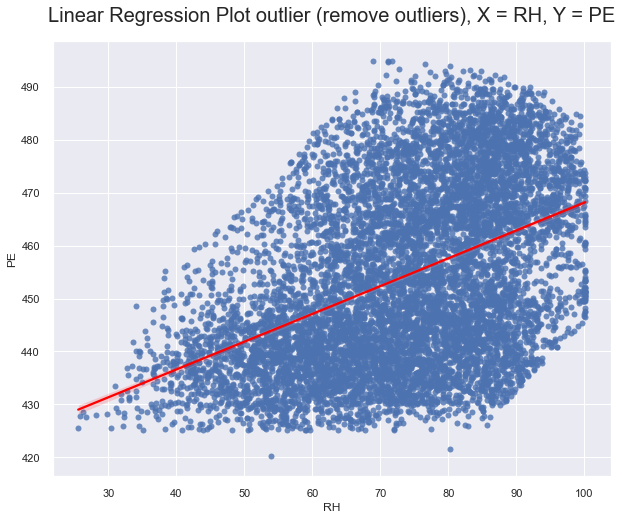

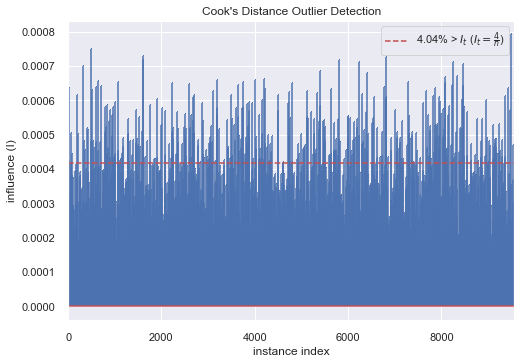

In [4]:
sns.set(color_codes=True)
features_list = raw_data.columns.to_list()[0:-1]
y_l = raw_data["PE"]
slm_params = {}

def plot_cooks_distance(c):
    _, ax = plt.subplots(figsize=(9,6))
    ax.stem(c, markerfmt=",")
    ax.axhline(4/len(c), c='r', ls='--', lw=1, label="$\frac{4}{n}$")
    ax.set_xlabel("instance")
    ax.set_ylabel("distance")
    ax.set_title("Cook's Distance Outlier Detection")
    return ax

for feature in features_list:
    olsdata = pd.DataFrame({feature:raw_data[feature], 'PE':y_l})
    equ = 'PE~%s'%feature
    ols_model = ols(equ, olsdata).fit()
    y_fitted = ols_model.fittedvalues
    print(feature, "and PE linear regression:")
    display(ols_model.summary())
    slm_params[feature] = ols_model.params[feature]
    
    plt.figure(figsize=(10, 8))
    p1 = sns.regplot(x=feature, y="PE", data=raw_data, ci= 95, line_kws={"color": "red"})
    title = "Linear Regression Plot, X = %s, Y = PE" % feature
    p1.set_title(title, y=1.03, fontsize=20)
    plt.show()
    
    # Compute the influence to get Cook's distance
    influence = OLSInfluence(ols_model)
    C, P = influence.cooks_distance
    Cook = pd.DataFrame(columns = ['Index', "Cook's Distance"])
    Cook['Index'] = raw_data.index.values
    Cook["Cook's Distance"] = C
    
    Cook_remove = Cook.loc[Cook["Cook's Distance"] >= 4/len(C)]
    Cook_keep = Cook.loc[Cook["Cook's Distance"] < 4/len(C)]
    
    # remove the outliers and model again
    data_outliers = pd.merge(Cook_keep, raw_data, how='left', left_index=True, right_index=True)
    ols2_model = ols(equ, data_outliers).fit()
    y_fitted2 = ols2_model.fittedvalues
    print(feature, "and PE linear regression (remove outliers):")
    display(ols2_model.summary())

    # plot the regression after removing the outliers.
    plt.figure(figsize=(10, 8))
    p2 = sns.regplot(x=feature, y="PE", data=data_outliers, ci= 95, line_kws={"color": "red"})
    title = "Linear Regression Plot outlier (remove outliers), X = %s, Y = PE" % feature
    p2.set_title(title, y=1.03, fontsize=20)
    plt.show()
    
    # plot the cookdistance 
    visualizer = CooksDistance()
    visualizer.fit(raw_data[feature].values.reshape(-1,1), y_l)
    visualizer.show()
    # plot_cooks_distance(C)
    
    print("\r")

### (d) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 : βj = 0?

#### All of the predictors can reject the null hypothesis. They are all have relationships with PE. 
#### $R^2=0.929$  Model and Variables $P=0.000$. There is a statistically signiﬁcant association between AT, V, AP, RH and PE.
#### $$PE = 454.6093 -1.9775 AT - 0.2339 V + 0.0621 AP - 0.1581 RH + \epsilon$$


In [5]:
mlr= ols('PE ~ AT + V + AP + RH', data=raw_data).fit()
display(mlr.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Thu, 23 Sep 2021   Prob (F-statistic):               0.00
Time:                        00:13:06   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    454.6093      9.749     46.634      0.000     435.500     473.718
AT            -1.9775      0.015   -129.342      0.000      -2.007      -1.948
V             -0.2339      0.007    -32.122      0.000      -0.248      -0.220
AP             0.0621      0.009      6.564      0.000       0.044       0.081
RH            -0.1581      0.004    -37.918      0.000      -0.166      -0.150
==============================================================================
Omnibus:                      892.002   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4086.777
Skew:                          -0.352   Prob(JB):                         0.00
Kurtosis:                       6.123   Cond. No.                     2.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### (e) How do your results from 1c compare to your results from 1d? Create a plot displaying the univariate regression coeﬃcients from 1c on the x-axis, and the multiple regression coeﬃcients from 1d on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coeﬃcient in a simple linear regression model is shown on the x-axis, and its coeﬃcient estimate in the multiple linear regression model is shown on the y-axis.

#### Answer:  
#### For AT, V and AP, the coeﬃcients of univariate regression are larger than those of the multiple regression.   
#### For RH, the coefficient of univariate regression is positive while the coefficient of multiple regression is negative.

,univariate regression,multiple regression
AT,-2.171320,-1.977513
V,-1.168135,-0.233916
AP,1.489872,0.062083
RH,0.455650,-0.158054


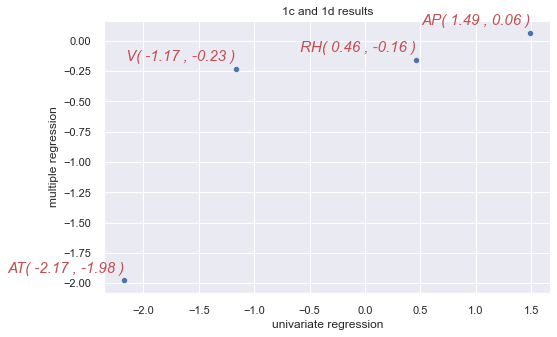

In [6]:
mlr_params = mlr.params.drop(["Intercept"])
edata = pd.DataFrame()
edata = edata.append(slm_params,ignore_index=True)
edata = edata.append(mlr_params, ignore_index=True)
edata = edata.T
edata.columns = ["univariate regression", "multiple regression"]
display(edata)

plt.figure(figsize=(8, 5))
pic_e = sns.scatterplot(x='univariate regression', y='multiple regression', data=edata)
plt.title('1c and 1d results')
for i in range(4):
    text = edata.index[i] + "( %.2f , %.2f )" % (edata["univariate regression"][i],edata["multiple regression"][i])
    plt.text(edata["univariate regression"][i],edata["multiple regression"][i]+0.1,s=text,fontsize=15, color = "r", style = "italic", weight = "light", verticalalignment='center', horizontalalignment='right',rotation=0)
plt.show()

### (f) Is there evidence of nonlinear association between any of the predictors and the response? To answer this question, for each predictor X, ﬁt a model of the form2 

#### $$ Y = β_0 + β_1 X + β_2 X^2 + β_3 X^3 + \epsilon$$

For AT, there is a nonlinear association between AT and PE. $R^2=0.912$  Model and Variables $P=0.000$  
$ PE = 492.7281 - 0.6103 AT -  0.1251 AT^2 + 0.0027 AT^3 + \epsilon$

For V, we can not say there is a nonlinear association between V and PE. Because $P(V^2)=0.768 > 0.05 $  

For AP, there is a nonlinear association between AP and PE. $R^2=0.275$  Model and Variables $P=0.000$ 
Even though P values show that there is statistically signiﬁcant association between AP and PE. $R^2$ shows that the model is not so accurate. The model does not fit the data so much. Only 27.5% of the variance can be explained by the model. 
$ PE = 0.0747 + 25.2556 AP -  0.05 AP^2 + 2.514e^-5 AP^3 + \epsilon$  

For RH, there is a nonlinear association between AP and PE. $R^2=0.154$  Model and Variables $P=0.000$ 
Even though P values show that there is statistically signiﬁcant association between RH and PE. $R^2$ shows that the model is not so accurate. The model does not fit the data so much. Only 15.4% of the variance can be explained by the model. 
$ PE = 468.4135 - 1.7292 RH +  0.0321 RH^2 - 0.0002 RH^3 + \epsilon$

From the equation above, we can also find the cubic term is very tiny which can be ignored.

AT and PE nonlinear regression:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Thu, 23 Sep 2021   Prob (F-statistic):               0.00
Time:                        00:13:06   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    492.7281      0.673    732.248      0.000     491.409     494.047
x1            -0.6103      0.124     -4.941      0.000      -0.852      -0.368
x2            -0.1251      0.007    -18.199      0.000      -0.139      -0.112
x3             0.0027      0.000     22.594      0.000       0.002       0.003
==============================================================================
Omnibus:                      648.041   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2767.059
Skew:                          -0.191   Prob(JB):                         0.00
Kurtosis:                       5.607   Cond. No.                     1.90e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

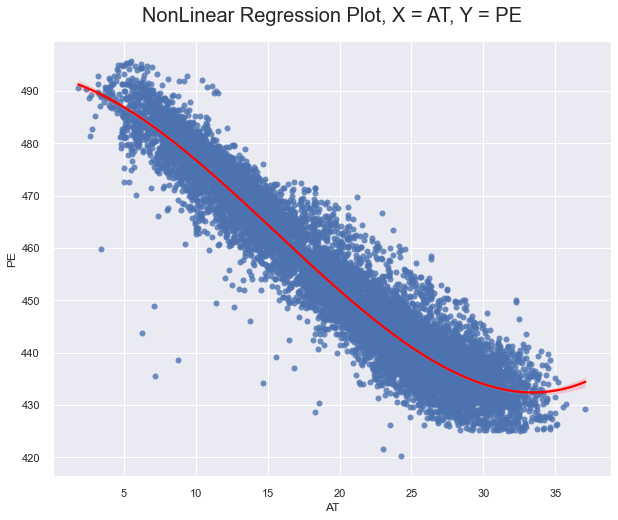

V and PE nonlinear regression:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Thu, 23 Sep 2021   Prob (F-statistic):               0.00
Time:                        00:13:08   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    554.1468      9.151     60.557      0.000     536.209     572.084
x1            -2.1444      0.509     -4.214      0.000      -3.142      -1.147
x2            -0.0027      0.009     -0.294      0.768      -0.021       0.015
x3             0.0001   5.45e-05      2.465      0.014    2.75e-05       0.000
==============================================================================
Omnibus:                      160.101   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              279.778
Skew:                          -0.125   Prob(JB):                     1.77e-61
Kurtosis:                       3.800   Cond. No.                     2.47e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

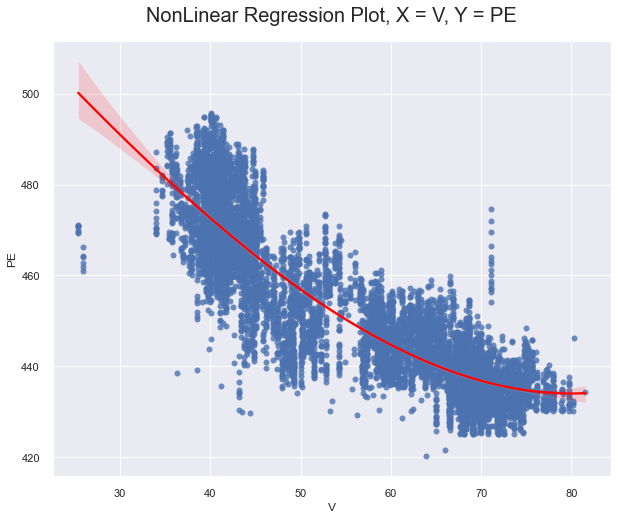

AP and PE nonlinear regression:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Thu, 23 Sep 2021   Prob (F-statistic):               0.00
Time:                        00:13:09   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0747      0.009      8.415      0.000       0.057       0.092
x1            25.2556      3.001      8.415      0.000      19.372      31.139
x2            -0.0500      0.006     -8.439      0.000      -0.062      -0.038
x3          2.514e-05   2.92e-06      8.613      0.000    1.94e-05    3.09e-05
==============================================================================
Omnibus:                      556.766   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              640.319
Skew:                           0.621   Prob(JB):                    9.05e-140
Kurtosis:                       2.751   Cond. No.                     2.12e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+15. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

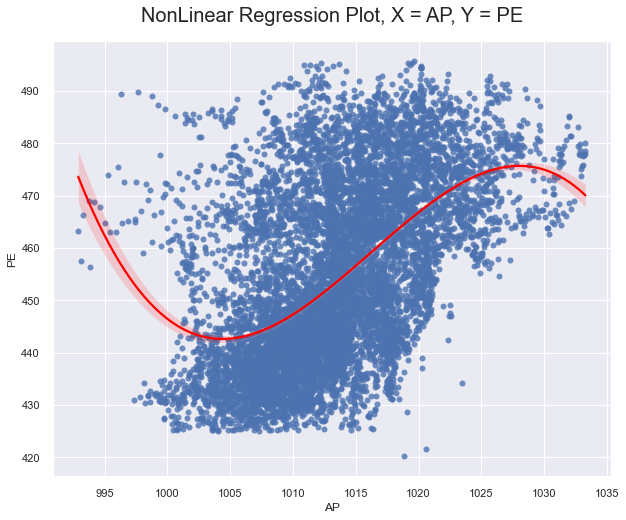

RH and PE nonlinear regression:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Thu, 23 Sep 2021   Prob (F-statistic):               0.00
Time:                        00:13:10   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    468.4135     10.545     44.422      0.000     447.744     489.083
x1            -1.7292      0.486     -3.557      0.000      -2.682      -0.776
x2             0.0321      0.007      4.433      0.000       0.018       0.046
x3            -0.0002   3.51e-05     -4.340      0.000      -0.000   -8.34e-05
==============================================================================
Omnibus:                      707.867   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              302.057
Skew:                           0.223   Prob(JB):                     2.56e-66
Kurtosis:                       2.253   Cond. No.                     3.26e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.26e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

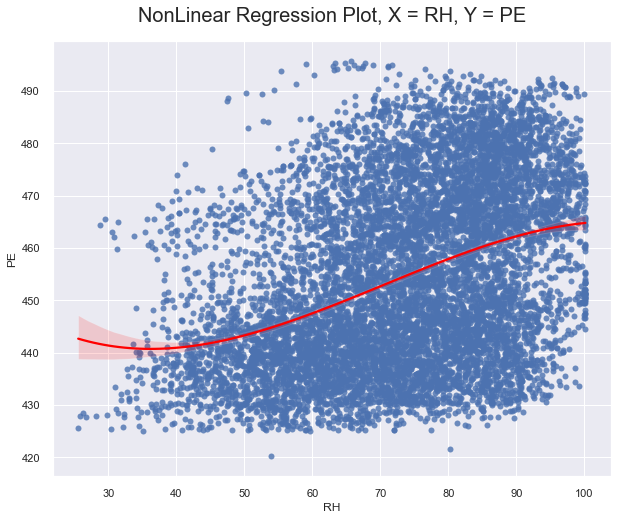

In [7]:
for feature in features_list:
    pf = PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)
    f_x_data = pf.fit_transform(raw_data[feature].values.reshape(-1,1))
    f_df = pd.DataFrame(f_x_data, columns = ["x1", "x2", "x3"])
    f_df["PE"] = y_l
    ols_model = ols('PE ~ x1 + x2 + x3', f_df).fit()
    y_fitted = ols_model.fittedvalues
    print(feature, "and PE nonlinear regression:")
    display(ols_model.summary())
   
    plt.figure(figsize=(10, 8))
    p2 = sns.regplot(x=feature, y="PE", data=raw_data, ci= 95, line_kws={"color": "red"}, order=3)
    title = "NonLinear Regression Plot, X = %s, Y = PE" % feature
    p2.set_title(title, y=1.03, fontsize=20)
    plt.show()

### (g) Is there evidence of association of interactions of predictors with the response? To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically signiﬁcant.

#### Answer:  
#### From the results table and observe the P value, there is association of interactions of predictors with the PE

#### The terms ATxV, ATxRH, VxAP, APxRH are all statistically signiﬁcant.

In [8]:
pg = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
g_x_data = pg.fit_transform(raw_data[features_list])
# print(pg.powers_)
# x1: AT, x2: V, x3: AP, x4: RH
g_columns = ["x1", "x2", "x3", "x4", "x1x2", "x1x3", "x1x4", "x2x3", "x2x4", "x3x4"]
x_g_data = pd.DataFrame(g_x_data, columns=g_columns)
x_g_data["PE"] = y_l

nlr= ols('PE ~ x1 + x2 + x3 + x4 + x1x2 + x1x3 + x1x4 + x2x3 + x2x4 + x3x4', data=x_g_data).fit()
display(nlr.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Thu, 23 Sep 2021   Prob (F-statistic):               0.00
Time:                        00:13:11   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.000     531.631     839.934
x1            -4.3470      2.373     -1.832      0.067      -8.999       0.305
x2            -7.6749      1.351     -5.682      0.000     -10.323      -5.027
x3            -0.1524      0.077     -1.983      0.047      -0.303      -0.002
x4             1.5709      0.773      2.031      0.042       0.055       3.087
x1x2           0.0210      0.001     23.338      0.000       0.019       0.023
x1x3           0.0018      0.002      0.752      0.452      -0.003       0.006
x1x4          -0.0052      0.001     -6.444      0.000      -0.007      -0.004
x2x3           0.0068      0.001      5.135      0.000       0.004       0.009
x2x4           0.0008      0.000      1.716      0.086      -0.000       0.002
x3x4          -0.0016      0.001     -2.125      0.034      -0.003      -0.000
==============================================================================
Omnibus:                     1454.609   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9170.848
Skew:                          -0.574   Prob(JB):                         0.00
Kurtosis:                       7.657   Cond. No.                     1.70e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### (h) Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? Train the regression model on a randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms and quadratic nonlinearities, and remove insigniﬁcant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report your train and test MSEs.

#### Answer:

We can use interaction and nonlinear terms to improve the model.  
The baseline regression model's $R^2 = 0.929$. The train MSE is 20.497755855986792. The test MSE is 21.403319696840256.  
And after some ajustment for the model with interaction and nonlinear terms,   
$R^2$ increases to 0.938. The train MSE of second model is 17.882738438839308 The test MSE of second model is 18.76936028808257.

The relationship is 

$ PE = -9936.2196 - 2.4377 AT -0.4529 V + 20.0828 AP + 6.0893 RH + 0.0181 AT^2 +0.0074 AT*V -0.0065 AT*RH - 0.0096 AP^2 -0.0057 AP*RH - 0.0022 RH^2 + \epsilon$


In [9]:
# The first model is only multiple regression. 

# Split the dataset

x1_train, x1_test, y1_train, y1_test = train_test_split(raw_data[features_list], y_l, test_size=0.30, random_state=424)
train1_data = pd.concat([x1_train,y1_train], axis=1)
model1= ols('PE ~ AT + V + AP + RH', data=train1_data).fit()
print("The first baseline multilinear regression:")
display(model1.summary())

y1_train_predict = model1.fittedvalues
y1_test_predict = model1.predict(exog=x1_test)


# MSE
mse_train = mean_squared_error(y1_train, y1_train_predict)
mse_test = mean_squared_error(y1_test, y1_test_predict)
print("\n")
print("test data R2", r2_score(y1_test, y1_test_predict))
print("The train MSE of first model is", mse_train)
print("The test MSE of first model is", mse_test)

The first baseline multilinear regression:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.183e+04
Date:                Thu, 23 Sep 2021   Prob (F-statistic):               0.00
Time:                        00:13:11   Log-Likelihood:                -19616.
No. Observations:                6697   AIC:                         3.924e+04
Df Residuals:                    6692   BIC:                         3.928e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    457.5866     11.536     39.667      0.000     434.973     480.200
AT            -1.9781      0.018   -108.030      0.000      -2.014      -1.942
V             -0.2344      0.009    -26.942      0.000      -0.251      -0.217
AP             0.0590      0.011      5.270      0.000       0.037       0.081
RH            -0.1554      0.005    -31.320      0.000      -0.165      -0.146
==============================================================================
Omnibus:                      632.773   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3097.188
Skew:                          -0.331   Prob(JB):                         0.00
Kurtosis:                       6.265   Cond. No.                     2.12e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""



test data R2 0.9283937482582232
The train MSE of first model is 20.497755855986792
The test MSE of first model is 21.403319696840256


In [10]:
# The second model uses possible interaction terms or nonlinear associations
# The second model involves all the interaction terms quadratic nonlinearities such as x1^2 , x2^2 etc.. (upto power of 2 is sufficient) 

ph = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
h_x_data = ph.fit_transform(raw_data[features_list])
x2_train, x2_test, y2_train, y2_test = train_test_split(h_x_data, y_l, test_size=0.30, random_state=424)

h_columns = ["x1", "x2", "x3", "x4", "x1_2", "x1x2", "x1x3", "x1x4", "x2_2", "x2x3", "x2x4", "x3_2", "x3x4", "x4_2"]
train2_data = pd.DataFrame(x2_train, columns=h_columns)
train2_data["PE"] = y2_train.values

model2= ols('PE ~ x1 + x2 + x3 + x4 + x1_2+ x1x2 + x1x3 + x1x4 + x2_2+ x2x3 + x2x4 + x3_2+ x3x4 + x4_2', data=train2_data).fit()
print("The regression model with all intertaction and quadratic terms:")
print("\n")
display(model2.summary())


# From the result, select the variables whose P value <= 0.05, so delete x1x3, x2x3, x2x4, fit model again and delete x2^2. 
print("\n")
print("From the result, select the variables whose P value <= 0.05, so delete x1, x1x3, x2x3, x2x4, fit model again and delete x2^2. ")
print("The second regression model with fixed intertaction and quadratic terms:")
print("\n")
model2_1= ols('PE ~ x1 + x2 + x3 + x4 + x1_2+ x1x2 + x1x4 + x3_2+ x3x4 + x4_2', data=train2_data).fit()
display(model2_1.summary())

h_new_columns = ["x1", "x2", "x3", "x4", "x1_2", "x1x2", "x1x4", "x3_2", "x3x4", "x4_2"]
test2_data = pd.DataFrame(x2_test, columns=h_columns)
test2_data = test2_data[h_new_columns]
y2_train_predict = model2_1.fittedvalues
y2_test_predict = model2_1.predict(test2_data)


# MSE
mse_train2 = mean_squared_error(y2_train, y2_train_predict)
mse_test2 = mean_squared_error(y2_test, y2_test_predict)
print("\n")
print("test data R2", r2_score(y2_test, y2_test_predict))
print("The train MSE of second model is", mse_train2)
print("The test MSE of second model is", mse_test2)

The regression model with all intertaction and quadratic terms:




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     7231.
Date:                Thu, 23 Sep 2021   Prob (F-statistic):               0.00
Time:                        00:13:11   Log-Likelihood:                -19149.
No. Observations:                6697   AIC:                         3.833e+04
Df Residuals:                    6682   BIC:                         3.843e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7328.9094   1416.540     -5.174      0.000   -1.01e+04   -4552.039
x1            -4.1859      3.702     -1.131      0.258     -11.444       3.072
x2            -3.9051      1.793     -2.177      0.029      -7.421      -0.389
x3            15.2406      2.747      5.549      0.000       9.856      20.625
x4             4.7641      1.044      4.566      0.000       2.719       6.810
x1_2           0.0128      0.004      3.442      0.001       0.006       0.020
x1x2           0.0160      0.003      4.917      0.000       0.010       0.022
x1x3           0.0016      0.004      0.436      0.663      -0.005       0.009
x1x4          -0.0077      0.002     -4.228      0.000      -0.011      -0.004
x2_2          -0.0024      0.001     -2.488      0.013      -0.004      -0.001
x2x3           0.0034      0.002      1.943      0.052   -3.08e-05       0.007
x2x4           0.0015      0.001      1.842      0.065   -9.41e-05       0.003
x3_2          -0.0074      0.001     -5.555      0.000      -0.010      -0.005
x3x4          -0.0044      0.001     -4.394      0.000      -0.006      -0.002
x4_2          -0.0022      0.000     -6.996      0.000      -0.003      -0.002
==============================================================================
Omnibus:                     1102.106   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7658.725
Skew:                          -0.604   Prob(JB):                         0.00
Kurtosis:                       8.098   Cond. No.                     2.83e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.83e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""



From the result, select the variables whose P value <= 0.05, so delete x1, x1x3, x2x3, x2x4, fit model again and delete x2^2. 
The second regression model with fixed intertaction and quadratic terms:




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 1.010e+04
Date:                Thu, 23 Sep 2021   Prob (F-statistic):               0.00
Time:                        00:13:11   Log-Likelihood:                -19159.
No. Observations:                6697   AIC:                         3.834e+04
Df Residuals:                    6686   BIC:                         3.842e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9936.2196   1082.245     -9.181      0.000   -1.21e+04   -7814.674
x1            -2.4377      0.102    -23.930      0.000      -2.637      -2.238
x2            -0.4529      0.032    -14.087      0.000      -0.516      -0.390
x3            20.0828      2.138      9.392      0.000      15.891      24.275
x4             6.0893      0.772      7.885      0.000       4.575       7.603
x1_2           0.0181      0.002      7.802      0.000       0.014       0.023
x1x2           0.0074      0.001      5.046      0.000       0.005       0.010
x1x4          -0.0065      0.001     -7.332      0.000      -0.008      -0.005
x3_2          -0.0096      0.001     -9.129      0.000      -0.012      -0.008
x3x4          -0.0057      0.001     -7.635      0.000      -0.007      -0.004
x4_2          -0.0022      0.000     -7.797      0.000      -0.003      -0.002
==============================================================================
Omnibus:                     1105.867   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7457.441
Skew:                          -0.617   Prob(JB):                         0.00
Kurtosis:                       8.020   Cond. No.                     2.15e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""



test data R2 0.9372058373720895
The train MSE of second model is 17.882738438839308
The test MSE of second model is 18.76936028808257


### (i) KNN Regression:

#### i. Perform k-nearest neighbor regression for this dataset using both normalized and raw features. Find the value of k ∈ { 1, 2, . . . , 100 } that gives you the best ﬁt. Plot the train and test errors in terms of 1/k.

#### Answer: 
##### The best K of raw features is 5 which test MSE is 16.39538302473005, R^2 is 0.9451481386579021  
##### The best K of normalized features is 11 which test MSE is 20.603020175249224, R^2 is 0.9310712043642652
##### The KNN model with raw features is better. So we choose the first model for next comparison with linear regression.


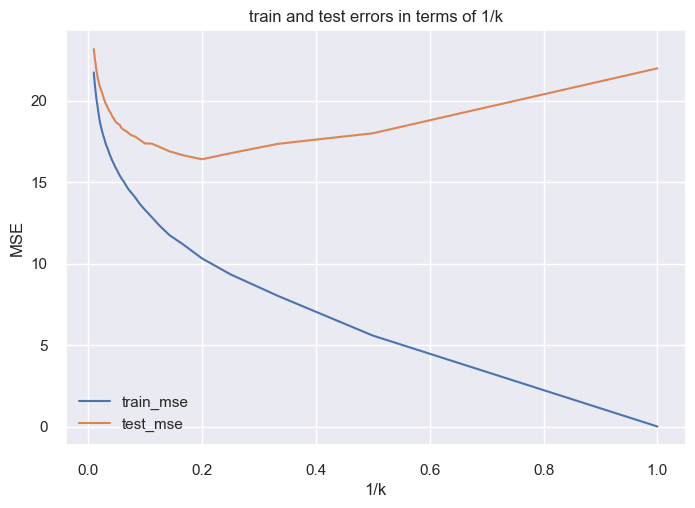

In [11]:
# raw features
mse_train_list = []
mse_test_list = []
r2_test_list = []
k_ori_list = range(1,101)
for k in range(1,101):
    knn1 = neighbors.KNeighborsRegressor(k, weights="uniform")
    knn1.fit((x1_train), (y1_train))
    y_knn1_train_predict = knn1.predict(x1_train)
    y_knn1_test_predict = knn1.predict(x1_test)
    mse_train_list.append(mean_squared_error(y1_train, y_knn1_train_predict))
    mse_test_list.append(mean_squared_error(y1_test, y_knn1_test_predict))
    r2_test_list.append(r2_score(y1_test, y_knn1_test_predict))
    # print(knn1.score(x1_test,y1_test)) # R2score=score
    
# plot the test error and train error
k_list = [1/x for x in range(1,101)]
plt.figure(dpi=100)
plt.plot(k_list, mse_train_list, label='train_mse');
plt.plot(k_list, mse_test_list, label='test_mse');
plt.title("train and test errors in terms of 1/k")
plt.xlabel('1/k')
plt.ylabel('MSE')
plt.legend();    

In [12]:
# find best K on the basis of mininize mse. 
max_r2 = max(r2_test_list)
maxindex = np.argwhere(r2_test_list == np.amax(r2_test_list)).flatten().tolist()
best_r2_k = [k_ori_list[x] for x in maxindex]
print("The best K of raw features is %s which test R2 is %s" %(best_r2_k[0], max_r2))

min_test_error = min(mse_test_list)
minindex = np.argwhere(mse_test_list == np.amin(mse_test_list)).flatten().tolist()
best_k = [k_ori_list[x] for x in minindex]
print("The best K of raw features is %s which test MSE is %s" %(best_k[0], min_test_error))

The best K of raw features is 5 which test R2 is 0.9451481386579021
The best K of raw features is 5 which test MSE is 16.39538302473005


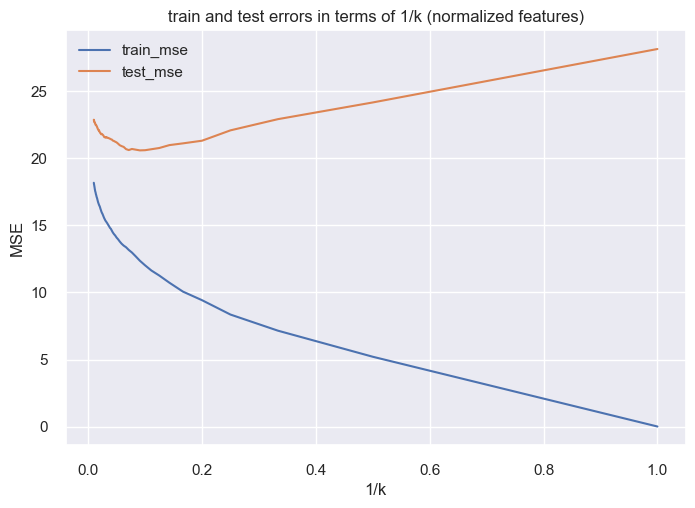

In [13]:
# normalized features
# use MinMaxScaler method
min_max_scaler = MinMaxScaler()
x_train_minmax = min_max_scaler.fit_transform(x1_train)
x_test_minmax = min_max_scaler.fit_transform(x1_test)

mse2_train_list = []
mse2_test_list = []
r22_test_list = []
for k in range(1,101):
    knn2 = neighbors.KNeighborsRegressor(k, weights="uniform")
    knn2.fit((x_train_minmax), (y1_train))
    y_knn2_train_predict = knn2.predict(x_train_minmax)
    y_knn2_test_predict = knn2.predict(x_test_minmax)
    mse2_train_list.append(mean_squared_error(y1_train, y_knn2_train_predict))
    mse2_test_list.append(mean_squared_error(y1_test, y_knn2_test_predict))
    r22_test_list.append(r2_score(y1_test, y_knn2_test_predict))
    # print("R2", k, r2_score(y1_test, y_knn2_test_predict))
    # print(knn2.score(x_test_minmax,y1_test)) # R2score=score
    
# plot the test error and train error
k_list = [1/x for x in range(1,101)]
plt.figure(dpi=100)
plt.plot(k_list, mse2_train_list, label='train_mse');
plt.plot(k_list, mse2_test_list, label='test_mse');
plt.title("train and test errors in terms of 1/k (normalized features)")
plt.xlabel('1/k')
plt.ylabel('MSE')
plt.legend();    

In [14]:
# find best K on the basis of mininize mse. 
max2_r2 = max(r22_test_list)
maxindex2 = np.argwhere(r22_test_list == np.amax(r22_test_list)).flatten().tolist()
best_r2_k2 = [k_ori_list[x] for x in maxindex2]
print("The best K of raw features is %s which test R2 is %s" %(best_r2_k2[0], max2_r2))

min2_test_error = min(mse2_test_list)
minindex2 = np.argwhere(mse2_test_list == np.amin(mse2_test_list)).flatten().tolist()
best_k2= [k_ori_list[x] for x in minindex2]
print("The best K of normalized features is %s which test MSE is %s " %(best_k2[0], min2_test_error))

The best K of raw features is 11 which test R2 is 0.9310712043642652
The best K of normalized features is 11 which test MSE is 20.603020175249224 


### (j) Compare the results of KNN Regression with the linear regression model that has the smallest test error and provide your analysis.

#### Answer:

#### For KNN model, we choose the raw features with K=5. For linear regression, we choose the one with interaction and nonlinear terms.
#### Compared with the MSE, test R2 table and plot below, KNN is better than linear regression. The orange points are closer to the red line (predicted value = real value) than the blue points.
|  | KNN(k=5) | multilinear regression | multilinear regression with interaction and nonlinear terms |
| ------ | ------ | ------ | ------ | 
| test MSE | 16.3954 | 21.4033 | 18.7694 | 
| test $R^2$ | 0.9451 | 0.9284 | 0.9372 | 



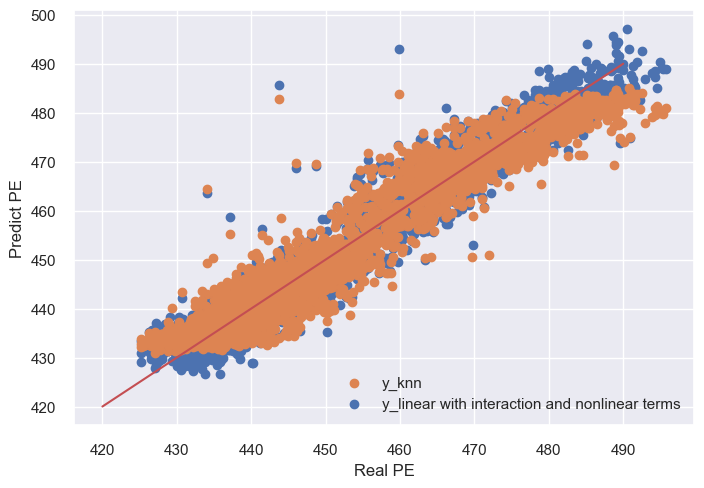

In [15]:
plt.figure(dpi=100)
# p1 = plt.scatter(y1_test, y1_test_predict)
p3 = plt.scatter(y1_test, y2_test_predict)
p2 = plt.scatter(y1_test, y_knn1_test_predict)

# plt.legend(handles=[p1,p2,p3],labels=['y_linear','y_knn', 'y_nonlinear'])
plt.legend(handles=[p2,p3],labels=['y_knn', 'y_linear with interaction and nonlinear terms'])

diagonal = np.linspace(420, 490, 10)
plt.plot(diagonal, diagonal, '-r')
plt.xlabel('Real PE')
plt.ylabel('Predict PE')

plt.show()

### Question 2

#### 2.4.1

#### 1. For each of parts (a) through (d), indicate whether we would generally expect the performance of a ﬂexible statistical learning method to be better or worse than an inﬂexible method. Justify your answer.

(a) The sample size n is extremely large, and the number of predictors p is small.

**Flexible is better. Given the large size of the data, flexible method can extract extra information from the large n.   
Besides, large size can avoid overfitting, which is the biggest problem with highly flexible methods.**

(b) The number of predictors p is extremely large, and the number of observations n is small.

**Inflexible is better. Becauset the size of data is small and has many features. It’s very likely to overfit the data using flexible method.**

(c) The relationship between the predictors and response is highly non-linear.

**Flexible is better. Flexible methods fit better in non-linearity relationship.**

(d) The variance of the error terms, i.e. σ 2 = Var(ϵ), is extremely high.

**Inflexible is better. Due to the high variance, the sample will have a lot of noise in the relationship. Therefore, the flexible model will try to fit the noise/error-term.**

### Question3
#### 2.4.7
#### 7. The table below provides a training data set containing six observations, three predictors, and one qualitative response variable.  



| Obs. | $X_1$ | $X_2$ | $X_3$ | Y |
| ------ | ------ | ------ | ------ | ------ | 
| 1 | 0 | 3 | 0 | Red |
| 2 | 2 | 0 | 0 | Red |
| 3 | 0 | 1 | 3 | Red |
| 4 | 0 | 1 | 2 | Green |
| 5 | -1 | 0 | 1 | Green |
| 6 | 1 | 1 | 1 | Red |

Suppose we wish to use this data set to make a prediction for Y when $X_1$ = $X_2$ = $X_3$ = 0 using K-nearest neighbors.

(a) Compute the Euclidean distance between each observation and the test point, $X_1$ = $X_2$ = $X_3$ = 0.

**Obs 1  Distance = $\sqrt[2]{(0-0)^2 + (3-0)^2 + (0-0)^2} = 3$**  
**Obs 2  Distance = $\sqrt[2]{(2-0)^2 + (0-0)^2 + (0-0)^2} = 2$**  
**Obs 3  Distance = $\sqrt[2]{(0-0)^2 + (1-0)^2 + (3-0)^2} = \sqrt{10}$**  
**Obs 4  Distance = $\sqrt[2]{(0-0)^2 + (1-0)^2 + (2-0)^2} = \sqrt{5}$**  
**Obs 5  Distance = $\sqrt[2]{(-1-0)^2 + (0-0)^2 + (1-0)^2} = \sqrt{2}$**  
**Obs 6  Distance = $\sqrt[2]{(1-0)^2 + (1-0)^2 + (1-0)^2} = \sqrt{3}$**  


(b) What is our prediction with K = 1? Why?

**When K = 1, the nearest one is Obs 5, So it is Green**

(c) What is our prediction with K = 3? Why?

**When K = 3, the nearest 3 points is Obs 5, Obs 6, Obs 2 which have 2 red and 1 green. So it is Red.**

(d) If the Bayes decision boundary in this problem is highly nonlinear, then would we expect the best value for K to be large or small? Why?

**Expect smaller K. Because the level of flexibility is inversely proportional to the number of K for KNN approach. Therefore, in order to fit non-linear characteristcs, a high flexible approach and a small K is needed.**